# Exploratory Data Analysis Using Python

This project performs a structured exploratory data analysis (EDA)
on a real-world transportation dataset using Python.
The focus is on understanding data behavior, quality issues,
and extracting justified insights — not on building models.


## 1. Problem Statement & Dataset Overview

This dataset contains records of taxi trips in New York City.
The objective of this analysis is to:

- Understand trip behavior in terms of distance, fare, and time
- Identify data quality issues that could mislead analysis
- Explore patterns and variability in real-world transportation data

This analysis does not attempt prediction or optimization.
It focuses on reasoning from data and understanding limitations.


In [2]:
import pandas as pd
df = pd.read_csv(r"D:\archive\nyc_taxi.csv")
df.shape

(100000, 19)

## 2. Data Understanding

Before cleaning or analysis, it is important to understand:
- dataset size and structure
- feature types
- missing or inconsistent values
- obvious anomalies


In [3]:
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RateCodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

In [5]:
df.describe(include="all")


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,100000.000000,100000,100000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
unique,NaN,33634,96328,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2015-01-01 02:40:56,2015-01-02 21:36:14,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16,3,NaN,NaN,NaN,NaN,NaN,99082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.516030,NaN,NaN,1.66818,2.766231,-72.575004,39.979964,1.036410,NaN,-72.617655,40.004596,1.38704,11.865925,0.320095,0.497570,1.544944,0.247435,0.284331,14.775254
std,0.499745,NaN,NaN,1.32375,3.438196,10.078630,5.553303,0.516534,NaN,9.925810,5.468119,0.49856,10.038756,0.373561,0.036798,2.286399,1.281223,0.066747,12.235517
min,1.000000,NaN,NaN,0.00000,0.000000,-80.592438,0.000000,1.000000,NaN,-74.393951,0.000000,1.00000,-138.900000,-1.000000,-0.500000,-58.090000,-5.330000,0.000000,-139.700000
25%,1.000000,NaN,NaN,1.00000,1.000000,-73.991592,40.736145,1.000000,NaN,-73.991150,40.734630,1.00000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.190000
50%,2.000000,NaN,NaN,1.00000,1.650000,-73.981461,40.753529,1.000000,NaN,-73.979805,40.753777,1.00000,9.000000,0.000000,0.500000,1.000000,0.000000,0.300000,11.160000
75%,2.000000,NaN,NaN,2.00000,2.990000,-73.966423,40.767785,1.000000,NaN,-73.962532,40.768926,2.00000,13.500000,0.500000,0.500000,2.080000,0.000000,0.300000,16.300000


In [6]:
df.isna().sum().sort_values(ascending=False)


VendorID                 0
dropoff_latitude         0
improvement_surcharge    0
tolls_amount             0
tip_amount               0
mta_tax                  0
extra                    0
fare_amount              0
payment_type             0
dropoff_longitude        0
tpep_pickup_datetime     0
store_and_fwd_flag       0
RateCodeID               0
pickup_latitude          0
pickup_longitude         0
trip_distance            0
passenger_count          0
tpep_dropoff_datetime    0
total_amount             0
dtype: int64

In [7]:
df.duplicated().sum()


0

### Initial Observations

- The dataset contains both numerical and categorical features.
- Some features show missing values.
- Numeric features exhibit skewed distributions.
- Duplicate records may exist and must be handled carefully.

No assumptions or cleaning decisions are made at this stage.


## 3. Data Cleaning & Preparation

Data cleaning decisions are made conservatively.
Each change is justified to avoid distorting real-world behavior.


In [8]:
initial_rows = df.shape[0]
df = df.drop_duplicates()
df.shape[0] - initial_rows


0

In [9]:
# Remove impossible or nonsensical values
if "trip_distance" in df.columns:
    df = df[df["trip_distance"] > 0]

if "fare_amount" in df.columns:
    df = df[df["fare_amount"] > 0]


### Cleaning Decisions Made

- Duplicate rows were removed to prevent skewed statistics.
- Trips with non-positive distance or fare were removed,
  as they do not represent valid taxi trips.
- Missing values were not aggressively filled at this stage,
  as imputation may introduce bias.

Further transformations are deferred until exploratory analysis.


## 4. Early Observations

- The dataset exhibits significant skew in numeric features,
  indicating that a small number of trips dominate averages.
- Data quality issues are present and require cautious handling.
- Cleaning decisions meaningfully affect downstream analysis.

Further insights will be developed after deeper exploration.


## 4. Exploratory Data Analysis

This section explores the distribution and relationships of key variables
to understand real-world trip behavior.


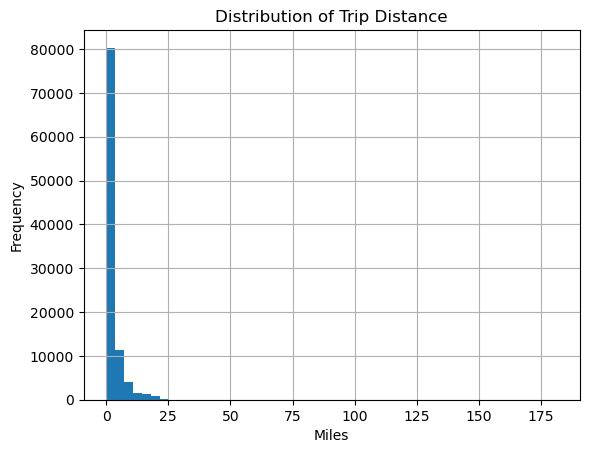

In [12]:
import matplotlib.pyplot as plt
df["trip_distance"].hist(bins=50)
plt.title("Distribution of Trip Distance")
plt.xlabel("Miles")
plt.ylabel("Frequency")
plt.show()


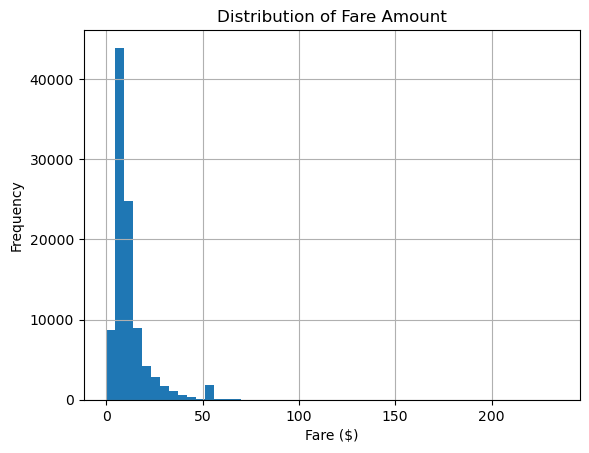

In [13]:
df["fare_amount"].hist(bins=50)
plt.title("Distribution of Fare Amount")
plt.xlabel("Fare ($)")
plt.ylabel("Frequency")
plt.show()


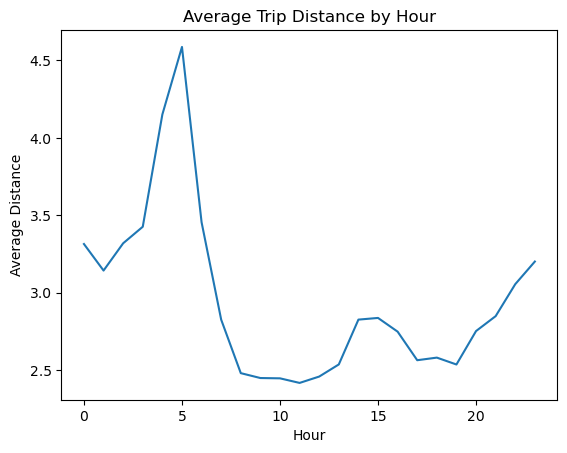

In [ ]:
# 1. Convert the column to datetime objects (if not already done)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# 2. Extract the hour into a new column
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df.groupby("hour")["trip_distance"].mean().plot()
plt.title("Average Trip Distance by Hour")
plt.xlabel("Hour")
plt.ylabel("Average Distance")
plt.show()


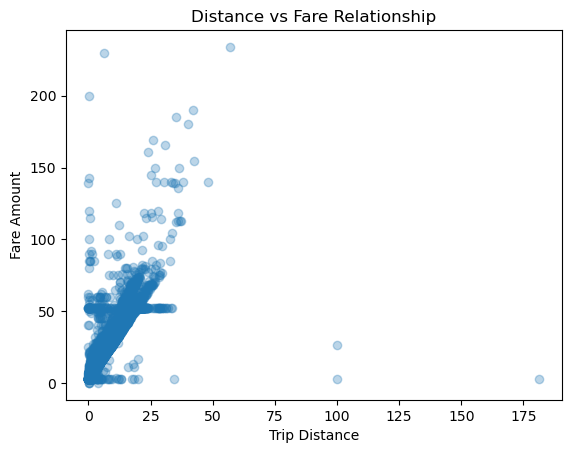

In [15]:
plt.scatter(df["trip_distance"], df["fare_amount"], alpha=0.3)
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Distance vs Fare Relationship")
plt.show()


## 5. Key Insights

1. Trip distance and fare distributions are heavily right-skewed,
   indicating that a small number of trips dominate averages.

2. Median values are more representative than means for most metrics.

3. Fare increases with distance but shows significant variance,
   suggesting the influence of external factors (traffic, time, routing).

4. Certain hours show higher average trip distances,
   indicating temporal travel patterns.

5. Outliers exist and should be investigated rather than blindly removed.


## 6. Limitations & Future Work

- The dataset represents a sampled subset of trips.
- External factors such as weather or traffic conditions are not included.
- Cleaning decisions may influence statistical summaries.
- Future work could explore richer temporal or spatial analysis.
